In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import math Library   -- # Check whether some values are NaN
import math

In [3]:
# Import the dataset file by method1 
# from google.colab import files
# uploaded = files.upload()

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/results.json   /content/results.json

# copy the expermintations files to deal with them
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_at.txt /content/test_at.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ca.txt /content/test_ca.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ch.txt /content/test_ch.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_al.txt /content/test_de_al.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_ni.txt /content/test_de_ni.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de.txt /content/test_de.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_fr.txt /content/test_fr.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_gb.txt /content/test_gb.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_it.txt /content/test_it.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ru.txt /content/test_ru.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_us.txt /content/test_us.txt

# copy the expermintations files from Mozilla Commen Voice v 10 to deal with them

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/cv-corpus04072022/de/validated.tsv /content/validated.tsv

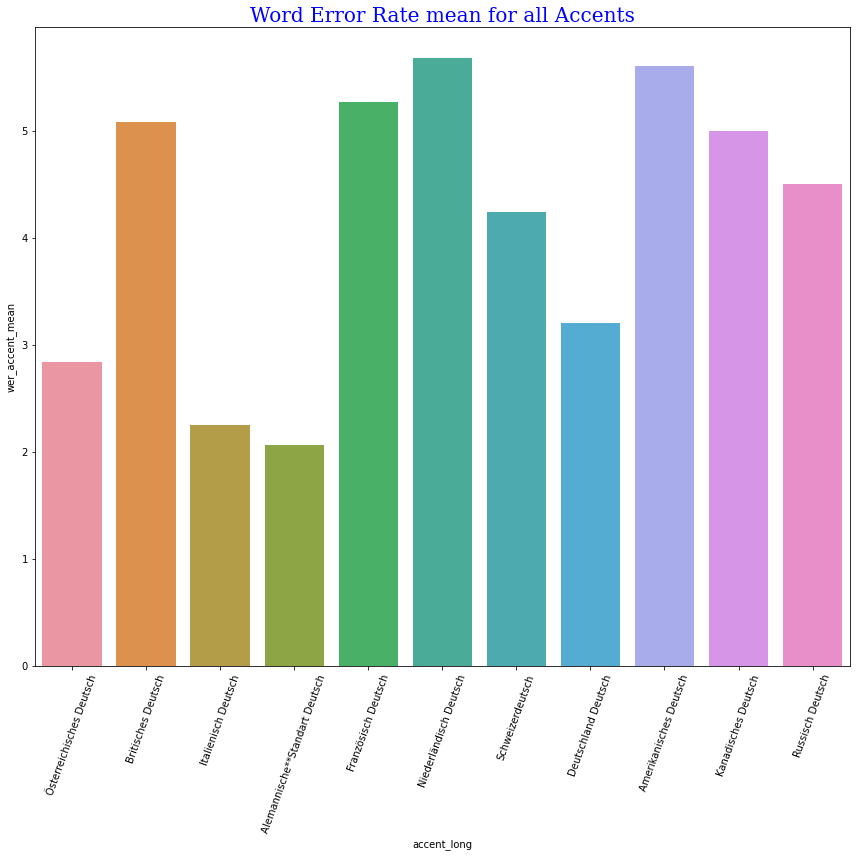

In [4]:
############################################################################################################################################ 
####################Bar chart: x='accent', y = 'wer_accent_mean' according to Word Error Rate Accent ='all Accent'##########################
############################################################################################################################################ 


import json
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.core.groupby import GroupBy

list_dataset_test_=['test_at.txt','test_gb.txt','test_it.txt','test_de_al.txt','test_fr.txt','test_de_ni.txt','test_ch.txt',
               'test_de.txt','test_us.txt','test_ca.txt','test_ru.txt']
list_dataset_test_accent=['Österreichisches Deutsch','Britisches Deutsch','Italienisch Deutsch','Alemannische Färbung,Schweizer Standart Deutsch',
'Französisch Deutsch','Niederländisch Deutsch','Schweizerdeutsch','Deutschland Deutsch','Amerikanisches Deutsch','Kanadisches Deutsch','Russisch Deutsch']


data_dict_accent_duration = {'accent_short': list_dataset_test_,'accent_long': list_dataset_test_accent }
dataset_wer_accent = pd.DataFrame(data_dict_accent_duration)

##############################################################################################################

list_accent_all_wer_mean_result=[]
dataset_accent_all_wer_mean_result=pd.DataFrame(list_accent_all_wer_mean_result,columns=['accent_short','accent_long','test_accent_txt','wer_accent_mean'])
##############################################################################################################


list_wer_accent_mean=[]

list_accent_Duration_mean=[]
list_test_file=[]
if __name__ == "__main__":

  results = json.load(open('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/results.json'))
  for test_file in results:
    ref_lens = [len(v["reference"].split(" ")) for v in results[test_file].values()]
    edits = [int(v["wer"] * ref_lens[i]) for i, v in enumerate(results[test_file].values())]
    # print(test_file, round(sum(edits) / sum(ref_lens) * 100, 2))
    # accent_Duration_mean=[accent_Duration_mean(v)=round(sum(edits) / sum(ref_lens) * 100, 2) for v in len(range(test_file))]
    # list_dataset_test_=[test_file for v in results[test_file].values()]
    list_wer_accent_mean.append(round(sum(edits) / sum(ref_lens) * 100, 2))
    list_test_file.append(test_file)


dataset_accent_all_wer_mean_result=pd.DataFrame({ 'wer_accent_mean':list_wer_accent_mean,'accent': list_test_file})
 


dataset_accent_all_wer_mean_result['accent_long']=np.where(dataset_accent_all_wer_mean_result['accent']==dataset_wer_accent['accent_short'],dataset_wer_accent['accent_long']
                                                                ,'000')
dataset_accent_all_wer_mean_result['accent_long']=np.where(dataset_accent_all_wer_mean_result['accent_long']=='Alemannische Färbung,Schweizer Standart Deutsch',
                                                           'Alemannische**Standart Deutsch',dataset_accent_all_wer_mean_result['accent_long'])
dataset_accent_all_wer_mean_result['accent']=dataset_accent_all_wer_mean_result['accent_long']



################################## Accent AT ###########################################
# position of the figure and figure's size 
figure_duriation_distribution_accent=plt.figure(12,figsize=(12,12))  
 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
 
dataset_accent_all_wer_mean_result['accent_long']=np.where(dataset_accent_all_wer_mean_result['accent_long']=='Alemannische Färbung,Schweizer Standart Deutsch',
                                                           'Alemannische**Standart Deutsch',dataset_accent_all_wer_mean_result['accent_long'])
plt.title('Word Error Rate mean for all Accents',fontdict  = font1)
 
ax = sns.barplot(x = 'accent_long' , y = 'wer_accent_mean', data = dataset_accent_all_wer_mean_result)

plt.xticks(rotation=70)
  
plt.tight_layout()
plt.savefig('plotBarDiagrams_Accent_WER.png')
